# Project 1
A dataset of employees of higher education schools and their salaries.
OBS: I'm just starting to learn, the results may not be considered.

In [1]:
# imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset and first configs

In [2]:
df = pd.read_csv("higher_ed_employee_salaries.csv")

# removing duplicates
df = df.drop_duplicates()

# types of every column
print(df.dtypes)

# number of lines 
print(df.shape[0])

# filling empty cells
# df.fillna(0, axis=1, inplace=True)

Name                object
School              object
Job Description     object
Department          object
Earnings           float64
Year                 int64
dtype: object
801136


# Some salaries statistics

In [3]:
# salaries agg
df.describe()

,Earnings,Year
count,7.928070e+05,801136.000000
mean,5.496168e+04,2017.099856
std,6.215192e+04,3.185830
min,2.000000e-02,2011.000000
25%,2.028557e+04,2014.000000
50%,4.470268e+04,2017.000000
75%,7.128000e+04,2020.000000
max,8.021377e+06,2022.000000


In [4]:
# top 10 highest salaries of 2022
df[df['Year'] == 2022].sort_values(by='Earnings', ascending=False).head(10)

,Name,School,Job Description,Department,Earnings,Year
565575,Ryan Day,The Ohio State University,Head Coach-Major Sports,Athletics | Football,8021376.56,2022
548431,Christopher Holtmann,The Ohio State University,Head Coach-Major Sports,Athletics | Basketball Men,3108721.18,2022
515000,Eugene Smith,The Ohio State University,Director-Athletics,Athletics | Administration,2672800.02,2022
599236,Jim Knowles,The Ohio State University,Assistant Coach-Major Sports,Athletics | Football,2105974.08,2022
933009,Vishnu Srinivasan,The Ohio State University,Vice Pres & Chief Inv Officer,Business and Finance | Office of Investments,1826263.14,2022
61009,Mark Larmore,The Ohio State University,Vice President-Health Services,Health Sciences | Administration,1691057.60,2022
682253,Kevin Wilson,The Ohio State University,Assistant Coach-Major Sports,Athletics | Football,1645200.04,2022
919564,Michael Eicher,The Ohio State University,Senior Vice President,Advancement | Senior Vice President,1525773.44,2022
561052,Jay Anderson,The Ohio State University,Chief Operating Officer (HS),Health Sciences | Administration,1468557.94,2022
26922,Harlan Sands,Cleveland State University,University Professor,LAW COLLEG,1398108.45,2022


In [5]:
# top 10 lowests
df[df['Year'] == 2022].sort_values(by='Earnings').head(10)

,Name,School,Job Description,Department,Earnings,Year
894395,chaimaa bourza,The Ohio State University,Custodial Worker 2 (HS),Ambulatory Services | Dublin Administration,0.02,2022
541990,Genisis White,The Ohio State University,Psychiatric Care Technician (HS),University Hospital | Emergency Department,0.03,2022
43792,Michael Hunter,The Ohio State University,Program Assistant,Athletics | Football,0.03,2022
840674,Hannah Salyers,The Ohio State University,Patient Care Associate (HS),"University Hospital | 4 Dodd Hall, General and...",0.03,2022
485939,Lashawn Hargrove,The Ohio State University,Patient Transporter (HS),University Hospital | Diagnostic Transportation,0.05,2022
635226,Lynn Williams,The Ohio State University,Med Ctr Security Dispatcher (HS),Health System Shared Services | Security,0.05,2022
95471,Demirra Muhammad,The Ohio State University,Patient Care Associate (HS),"James | 20 East and West, Gynecology and Urology",0.05,2022
49781,Shelby Bechstein,The Ohio State University,"Vet Care Tch-Ans, PM & CC",Veterinary Medical Center | Equine,0.06,2022
274852,Zachary Gottschall,The Ohio State University,Clinical Research Assistant,CCC | Clinical Trials Office,0.06,2022
153509,DESTINY BUCHANAN,The Ohio State University,Clinical Lab Technologist,CCC | Clinical Trials Processing Lab,0.07,2022


# Salaries mean, std and employee count per school per year

In [6]:
earnings_school = df.groupby(['School', 'Year'])['Earnings'].agg(['count', 'mean','std'])
earnings_school['mean'] = earnings_school['mean'].apply(lambda x: f'{x:.2f}').astype(float)
earnings_school['std'] = earnings_school['std'].apply(lambda x: f'{x:.2f}').astype(float)
earnings_school

count      mean       std
School                         Year                           
Bowling Green State University 2012   2916  42593.91  34953.47
                               2013   2816  44432.10  37089.60
                               2014   2754  45076.78  38661.65
                               2015   2691  45698.53  39324.38
                               2016   2675  46800.06  39868.42
...                                    ...       ...       ...
Youngstown State University    2018   2968  24117.37  31294.06
                               2019   2923  25076.39  32559.04
                               2020   3433  20051.57  30390.17
                               2021   3270  20215.55  31434.81
                               2022   3711  18400.69  30283.31

[141 rows x 3 columns]

# Salaries mean per year

Text(7.125000000000009, 0.5, 'Earnings mean (U$)')

<Figure size 1000x600 with 0 Axes>

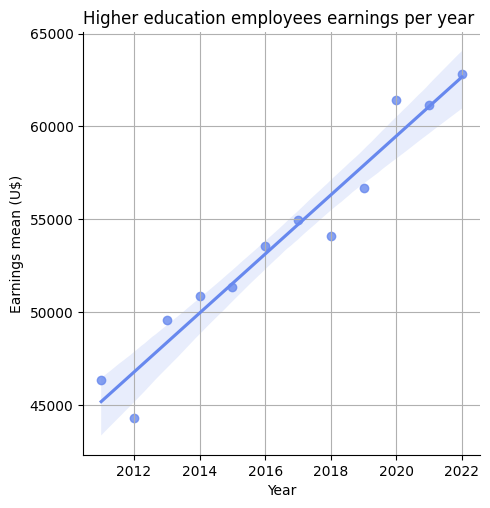

In [7]:
# groupby and mean
salaries_year = df.groupby('Year')['Earnings'].mean().reset_index()

# config
plt.figure(figsize=(10, 6))
sns.set_palette('coolwarm')

# scatter graph
sns.lmplot(data=salaries_year, x='Year', y='Earnings')

plt.grid()
plt.title('Higher education employees earnings per year ')
plt.ylabel("Earnings mean (U$)")

<Axes: xlabel='Year', ylabel='Earnings'>

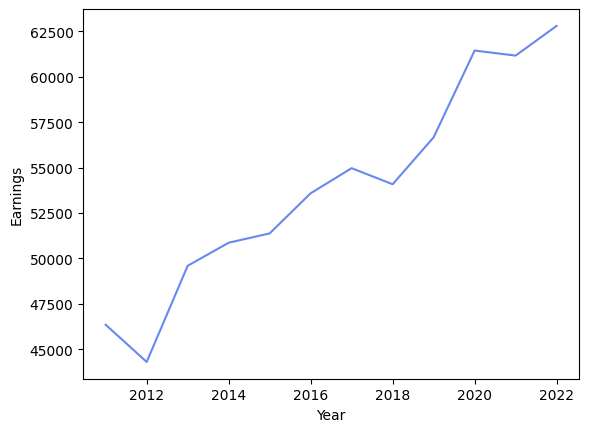

In [8]:
# line graph
sns.lineplot(data=salaries_year, x='Year', y='Earnings')

# 2022 salaries mean and employees per school

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'University Of Cincinnati'),
  Text(1, 0, 'The Ohio State University'),
  Text(2, 0, 'Cleveland State University'),
  Text(3, 0, 'Bowling Green State University'),
  Text(4, 0, 'University of Toledo'),
  Text(5, 0, 'Ohio University'),
  Text(6, 0, 'Wright State University'),
  Text(7, 0, 'Kent State University'),
  Text(8, 0, 'Miami University'),
  Text(9, 0, 'University of Akron'),
  Text(10, 0, 'Central State University'),
  Text(11, 0, 'Shawnee State University'),
  Text(12, 0, 'Youngstown State University')])

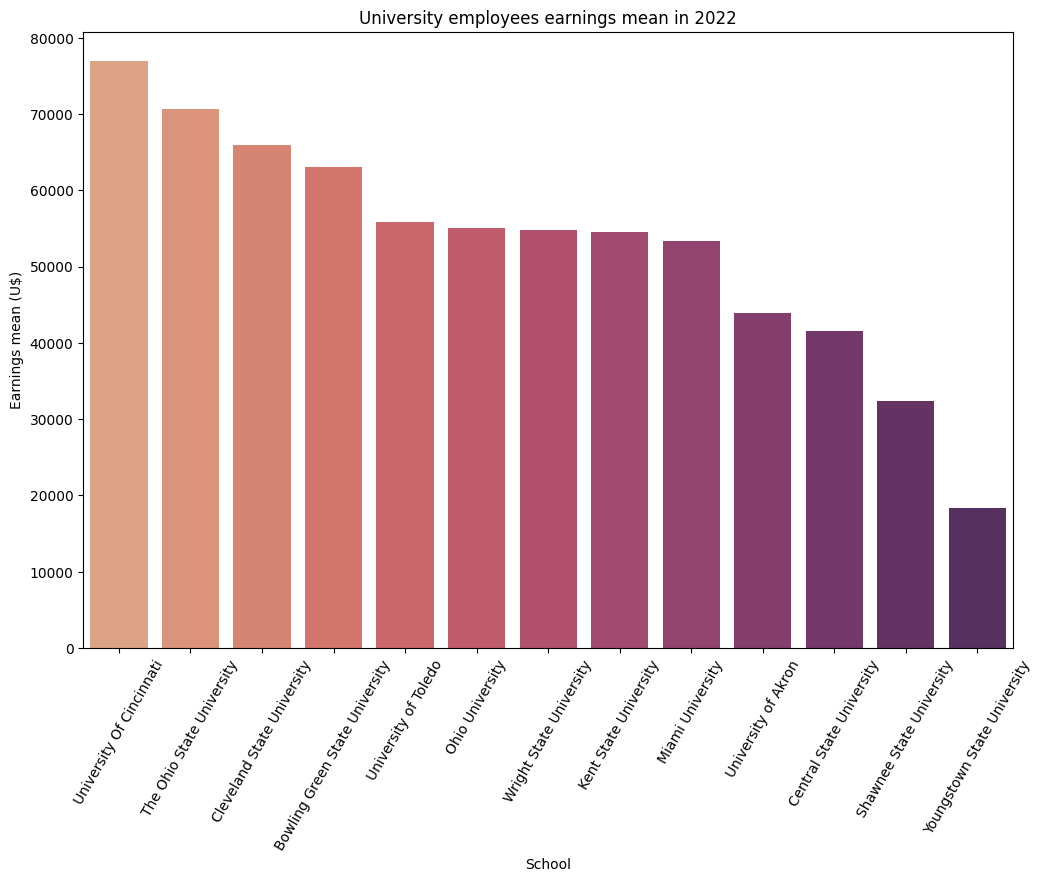

In [9]:
salaries_school = df[df['Year'] == 2022].groupby('School')['Earnings'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(12, 8))

# salaries mean
sns.barplot(data=salaries_school, x='School', y='mean', palette='flare', hue='School', legend=False)

plt.title("University employees earnings mean in 2022")
plt.ylabel("Earnings mean (U$)")
plt.xticks(rotation=60)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'The Ohio State University'),
  Text(1, 0, 'University Of Cincinnati'),
  Text(2, 0, 'University of Toledo'),
  Text(3, 0, 'Ohio University'),
  Text(4, 0, 'Kent State University'),
  Text(5, 0, 'Miami University'),
  Text(6, 0, 'Youngstown State University'),
  Text(7, 0, 'University of Akron'),
  Text(8, 0, 'Bowling Green State University'),
  Text(9, 0, 'Wright State University'),
  Text(10, 0, 'Cleveland State University'),
  Text(11, 0, 'Central State University'),
  Text(12, 0, 'Shawnee State University')])

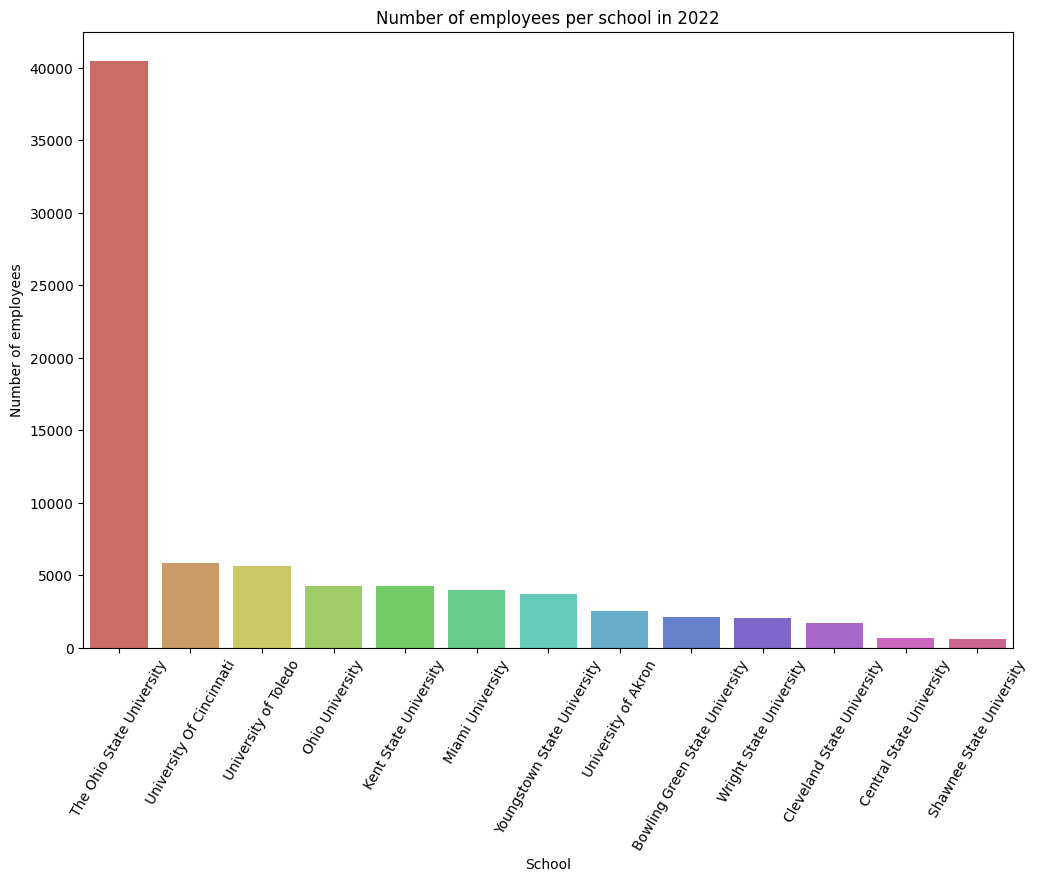

In [11]:
salaries_school = salaries_school.sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))

# salaries mean
sns.barplot(data=salaries_school, x='School', y='count', palette='hls', hue='School', legend=False)

plt.title("Number of employees per school in 2022")
plt.ylabel("Number of employees")
plt.xticks(rotation=60)